# Charity Funding Predictor
## Preprocessing

#### 1. Read in the charity_data.csv to a Pandas DataFrame

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


#### 2. Drop the `EIN` and `NAME` columns.

In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(['EIN', 'NAME'],axis=1)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


#### 3. Determine the number of unique values for each column.

In [3]:
# Determine the number of unique values in each column.
unique_values = application_df.nunique(axis=0)
unique_values

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

#### 4. For columns that have more than 10 unique values, determine the number of data points for each unique value.

In [4]:
# Look at APPLICATION_TYPE value counts for binning
APP_count = application_df['APPLICATION_TYPE'].value_counts()
APP_count

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

#### 5. Use the number of data points for each unique value to pick a cutoff point to bin "rare" categorical variables together in a new value, `Other`, and then check if the binning was successful.

In [5]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(APP_count[APP_count<500].index)
# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [6]:
# Look at CLASSIFICATION value counts for binning
CLASSIFICATION_counts = application_df['CLASSIFICATION'].value_counts()
CLASSIFICATION_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [7]:
# You may find it helpful to look at CLASSIFICATION value counts >1
helpful_CLASSIFICATION_counts = application_df['CLASSIFICATION'].value_counts().loc[lambda x : x>1]
helpful_CLASSIFICATION_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [8]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(CLASSIFICATION_counts[CLASSIFICATION_counts<1000].index)
# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# # Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

#### 6. Use `pd.get_dummies()` to encode categorical variables.

In [9]:
# Convert categorical data to numeric with `pd.get_dummies`
data_dummies = pd.get_dummies(application_df)
data_dummies.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [10]:
# Split our preprocessed data into our features and target arrays
y = data_dummies['IS_SUCCESSFUL']

# Split the preprocessed data into a training and testing dataset
X = data_dummies.drop(['IS_SUCCESSFUL'],axis=1)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=90)

In [11]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [12]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_of_features = len(X_train_scaled[0])
dense = 80
dense_1 = 30
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=dense, input_dim= number_of_features, activation='relu'))
# Second hidden layer
nn.add(tf.keras.layers.Dense(units=dense_1, activation='relu'))
# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3520      
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Compile the model
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 3s 2ms/step - loss: 0.5697 - accuracy: 0.7232
Epoch 2/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5542 - accuracy: 0.7297
Epoch 3/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5512 - accuracy: 0.7320
Epoch 4/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5502 - accuracy: 0.7334
Epoch 5/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5489 - accuracy: 0.7322
Epoch 6/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5481 - accuracy: 0.7327
Epoch 7/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5467 - accuracy: 0.7341
Epoch 8/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5464 - accuracy: 0.7343
Epoch 9/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5457 - accuracy: 0.7348
Epoch 10/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5457 - accura

804/804 [==============================] - 2s 2ms/step - loss: 0.5364 - accuracy: 0.7402
Epoch 82/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5362 - accuracy: 0.7395
Epoch 83/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5356 - accuracy: 0.7392
Epoch 84/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5359 - accuracy: 0.7399
Epoch 85/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5362 - accuracy: 0.7400
Epoch 86/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5358 - accuracy: 0.7404
Epoch 87/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5356 - accuracy: 0.7393
Epoch 88/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5354 - accuracy: 0.7399
Epoch 89/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5355 - accuracy: 0.7402
Epoch 90/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5354 - accuracy: 

In [15]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5624 - accuracy: 0.7235 - 733ms/epoch - 3ms/step
Loss: 0.562383770942688, Accuracy: 0.723498523235321


In [16]:
# Export our model to HDF5 file
nn.save("./Resources/AlphabetSoupCharity.h5")

<AxesSubplot:>

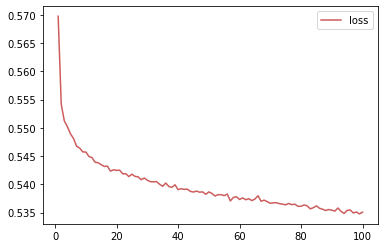

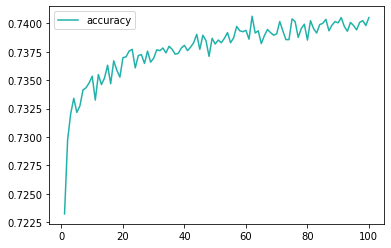

In [17]:
Report_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
Report_df.index += 1

# Plot the loss
Report_df.plot(y="loss", color='indianred')
Report_df.plot(y="accuracy", color='lightseagreen')